## ARIMA 모델을 이용한 유튜버 성장률 예측

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 유튜버 정보 csv에서 읽어오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/씨디맨_stat.csv',index_col = 'searchDate')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,dailyViewCount,subscriberCount,videoCount,favorablePercent,activePercent
searchDate,,,,,
2020-02-14,23951,79700,4378,0,51
2020-02-15,24636,79700,4380,0,51
2020-02-16,25744,79800,4380,0,52
2020-02-17,26328,79800,4381,0,52
2020-02-18,25206,79800,4381,0,51
...,...,...,...,...,...
2021-02-12,21047,88400,4531,90,15
2021-02-13,22022,88400,4532,90,15
2021-02-14,21307,88400,4532,90,15


## 컬럼 정리 (구독자 수만 남겨놓기)

In [ ]:
del df['dailyViewCount']
del df['videoCount']
del df['favorablePercent']
del df['activePercent']

In [ ]:
df

,subscriberCount
searchDate,
2020-02-14,79700
2020-02-15,79700
2020-02-16,79800
2020-02-17,79800
2020-02-18,79800
...,...
2021-02-12,88400
2021-02-13,88400
2021-02-14,88400


## 30일 예측하기 위해서 마지막 한달 데이터 test로 분리

In [ ]:
df_size = len(df)
pred_date = 30 # 30일 예측
target_date = df_size - pred_date

In [ ]:
train_df = df[:target_date]

In [ ]:
test_df = df[target_date:]

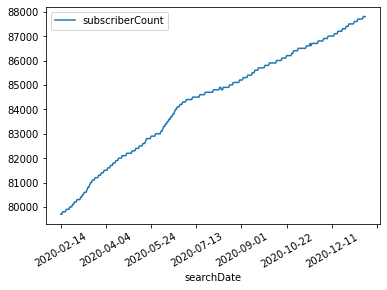

In [ ]:
train_df.plot()
plt.xticks(rotation=30)
plt.show()

## ARIMA 모델 설계 및 학습

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(train_df.subscriberCount.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  337
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1724.838
Method:                       css-mle   S.D. of innovations             40.378
Date:                Sun, 21 Feb 2021   AIC                           3461.676
Time:                        06:53:41   BIC                           3484.596
Sample:                             1   HQIC                          3470.811
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9664      3.092      7.752      0.000      17.907      30.026
ar.L1.D.y      1.2130      0.099     12.270      0.000       1.019       1.407
ar.L2.D.y     -0.2796      0.096     -2.924      0.0

## 최종 30일 예측값 시각화

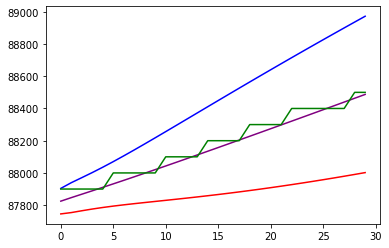

In [ ]:
# 학습 데이터셋으로부터 30일 뒤를 예측합니다.
forecast_data = model_fit.forecast(steps=30) 

pred_y = forecast_data[0].tolist() # 마지막 30일의 예측 데이터
test_y = test_df.subscriberCount.values # 실제 30일 가격 데이터
pred_y_lower = [] # 마지막 30일의 예측 데이터의 최소값
pred_y_upper = [] # 마지막 30일의 예측 데이터의 최대값
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

#plt.ylim([78000,88000])
plt.plot(pred_y, color="purple") # 모델이 예상한 그래프
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소 그래프
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대 그래프
plt.plot(test_y, color="green") # 실제 가격 그래프

In [ ]:
from sklearn import metrics

print(metrics.mean_absolute_error(test_y, pred_y))

33.80443990158868


In [ ]:
forecast_data[0]

array([87824.79294573, 87846.68616879, 87867.90669985, 87889.12213781,
       87910.51950811, 87932.13898386, 87953.97699507, 87976.01797746,
       87998.24405009, 88020.63787601, 88043.18342594, 88065.86610468,
       88088.67269086, 88111.59122851, 88134.61091243, 88157.7219794 ,
       88180.91560834, 88204.18382955, 88227.51944262, 88250.91594222,
       88274.36745094, 88297.86865874, 88321.41476815, 88345.0014448 ,
       88368.62477272, 88392.28121396, 88415.96757207, 88439.68095918,
       88463.41876615, 88487.17863575])

## 발표날까지 예측

In [ ]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습
model = ARIMA(df.subscriberCount.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  367
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1876.187
Method:                       css-mle   S.D. of innovations             40.140
Date:                Sun, 21 Feb 2021   AIC                           3764.375
Time:                        06:53:42   BIC                           3787.807
Sample:                             1   HQIC                          3773.685
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8816      2.826      8.450      0.000      18.343      29.421
ar.L1.D.y      1.2101      0.092     13.125      0.000       1.029       1.391
ar.L2.D.y     -0.2789      0.089     -3.132      0.0

In [ ]:
# 2021/02/16 데이터셋으로부터 발표날까지 step일 이후까지 예측
step = 9
forecast_data = model_fit.forecast(steps=step) 

In [ ]:
# 기존 데이터 마지막 날의 다음 날을 구함(= 미래 예측 데이터의 시작 날짜)
next = str(pd.date_range(df.index[-1], periods=2)[1])[:10]

In [ ]:
# 예측 데이터 날짜 리스트 생성
forecast_date = []
for i in range(step):
  forecast_date.append(str(pd.date_range(next, periods=step)[i])[:10])

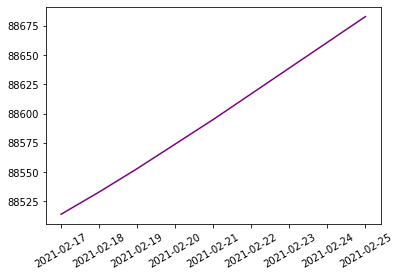

In [ ]:
pred_y = forecast_data[0].astype(int).tolist() #예측 데이터

plt.xticks(list(range(step)), forecast_date, rotation = 30)
plt.xticks(rotation=30)
plt.plot(pred_y, color="purple") # 모델이 예상한 구독자 수 그래프

In [ ]:
# 실제 예측 데이터 값
forecast_data[0].astype(int)

array([88514, 88533, 88553, 88574, 88595, 88617, 88639, 88661, 88683])

In [ ]:
# 기존(과거) 데이터와 예측(미래) 데이터를 한 배열로 합침
arr = np.append(df['subscriberCount'].to_numpy(), pred_y)

In [ ]:
# 날짜 데이터 배열 생성
date_arr = []
for i in range(len(arr)):
  # 날짜가 너무 많으면 보기 힘드므로 10일에 한번씩만 기록하고 나머지는 공백
  if i % 10 == 0:
    date_arr.append(str(pd.date_range(df.index[0], periods=len(arr))[i])[:10])
  else:
    date_arr.append("")

# 마지막 날짜로부터 예측일 범주까지는 비움(마지막날이랑 가까우면 그래프에서 겹쳐서 안보임)
for i in range(1,step):
  date_arr[len(date_arr)-i] = ""

# 전체 날짜 데이터 마지막 날을 예측 데이터 마지막 날로 대체
date_arr[len(date_arr)-1] = forecast_date[-1]

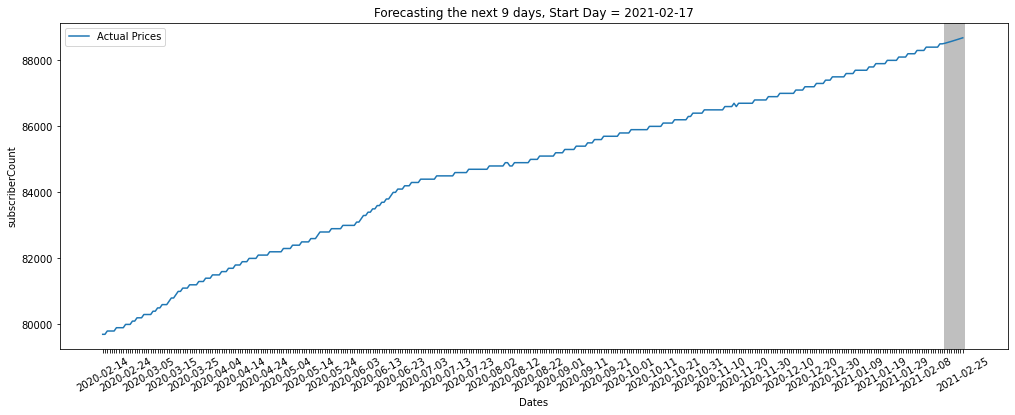

In [ ]:
plt.figure(figsize=(17,6))
# 기존(과거) 데이터
plt.plot(arr, label="Actual Prices")
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(pred_y)} days, Start Day = {forecast_date[0]}")
# 미래 예측 구간 강조
plt.axvspan(len(df), len(arr), facecolor='gray', alpha=0.5)
# x 축 값 이름 변경 / 회전
plt.xticks(list(range(len(arr))), date_arr, rotation = 30)
plt.legend()
plt.show()

In [ ]:
import datetime
from pytz import timezone, utc

KST = timezone('Asia/Seoul')
now = datetime.datetime.utcnow()
print(utc.localize(now).astimezone(KST))

2021-02-21 15:53:43.739109+09:00
